In [1]:
import pandas as pd
import seaborn as sns

In [40]:
orig_df = pd.concat(
    [
        pd.read_csv("original_implementation.csv", index_col=0),
        pd.read_csv("original_implementation_n2000_d1000.csv", index_col=0),
        pd.read_csv("original_implementation_n5000_d1000.csv", index_col=0),
    ],
    axis=0,
).reset_index(drop=True)
orig_df["implementation"] = "baseline"
orig_df["jobs"] = "baseline"

sklearn_df = pd.concat(
    [
        pd.read_csv("sklearn_jobs-1.csv", index_col=0).assign(jobs=-1),
        pd.read_csv("sklearn_jobs8.csv", index_col=0).assign(jobs=8),
        pd.read_csv("sklearn_jobs8_n20000.csv", index_col=0).assign(jobs=8),
        pd.read_csv("sklearn_jobs64.csv", index_col=0).assign(jobs=64),

    ],
    axis=0,
).reset_index()
sklearn_df["implementation"] = "sklearn"

df = pd.concat([orig_df, sklearn_df], axis=0).reset_index(drop=True)

df.head()

,Function,N_instances,N_features,Time,Device,implementation,jobs,index
0,magnitude_difference,100,100,0.000266,CPU,baseline,baseline,NaN
1,concentricity_difference,100,100,0.000160,CPU,baseline,baseline,NaN
2,uniformity_difference,100,100,0.000754,CPU,baseline,baseline,NaN
3,rsm_norm_diff,100,100,0.000396,CPU,baseline,baseline,NaN
4,eigenspace_overlap_score,100,100,0.010299,CPU,baseline,baseline,NaN


### Runtime for baseline implementation.

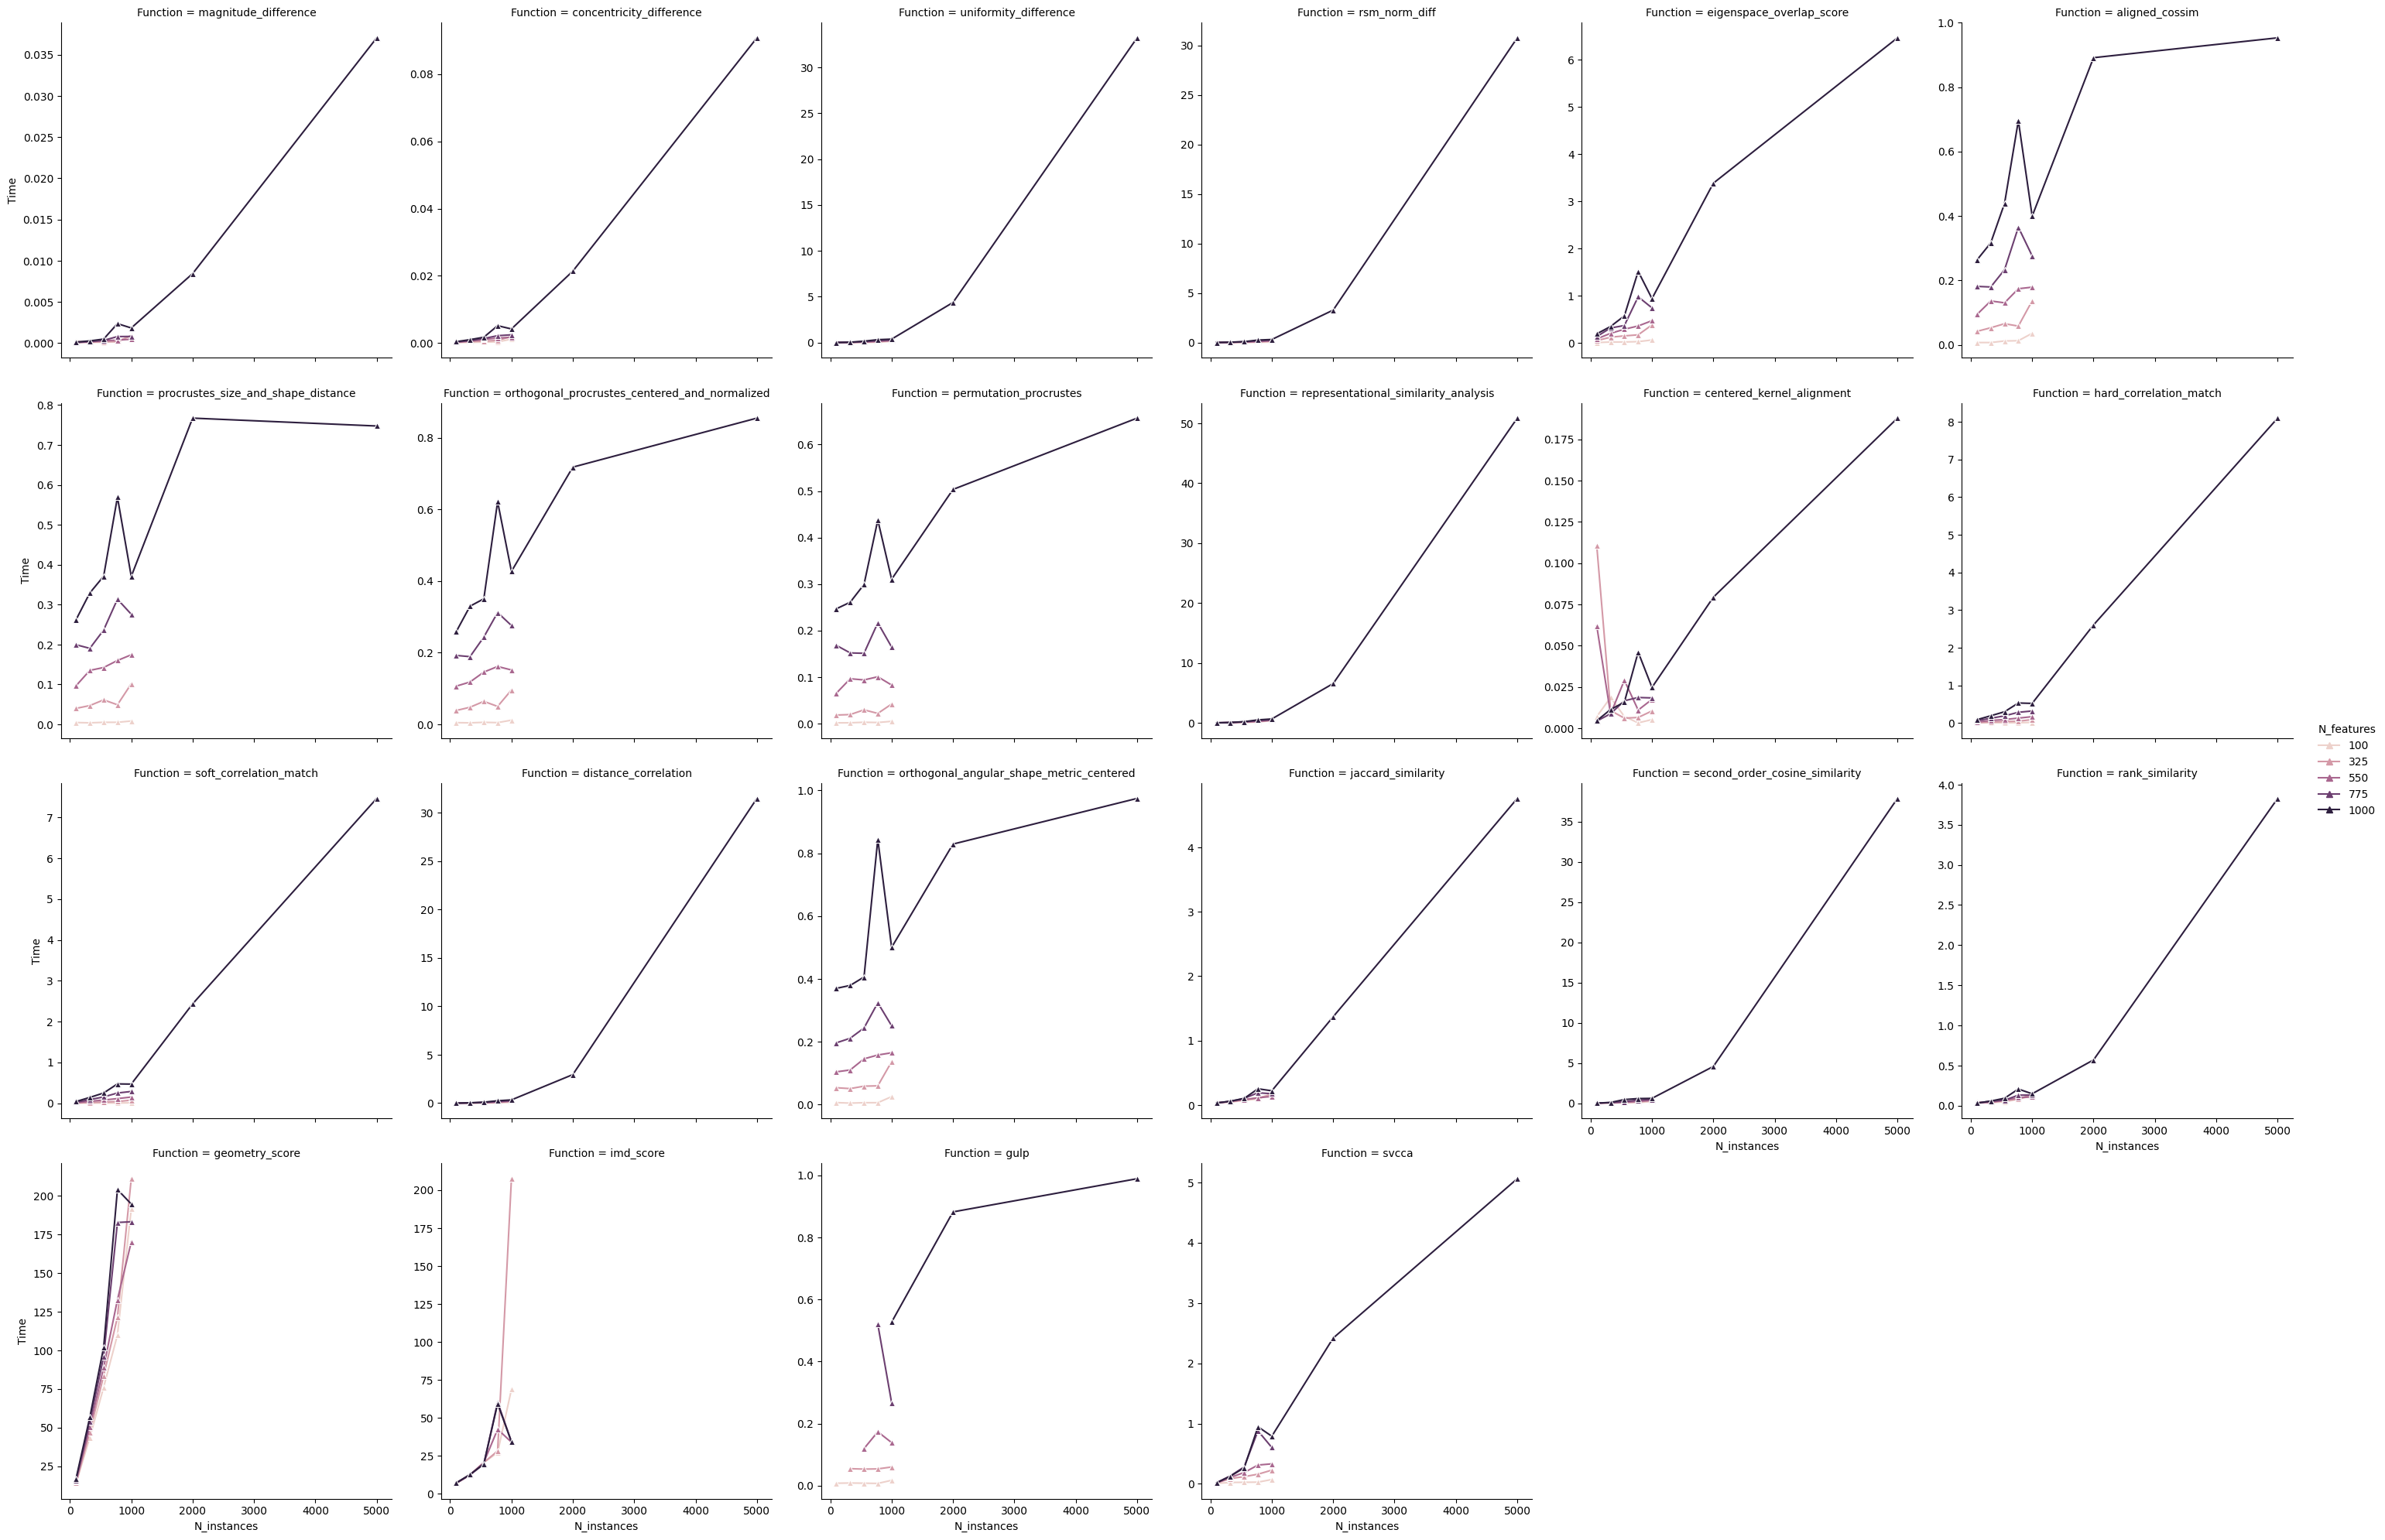

In [22]:
sns.relplot(
    data=orig_df,
    x="N_instances",
    y="Time",
    hue="N_features",
    col="Function",
    facet_kws={"sharey": False, "sharex": True},
    kind="line",
    col_wrap=6,
    marker="^",
)

### Runtime comparison baseline/sklearn with D=1000

Only change: replace scipy pdist and cdist with sklearn pairwise_distance with n_jobs=-1 (using all CPUs).

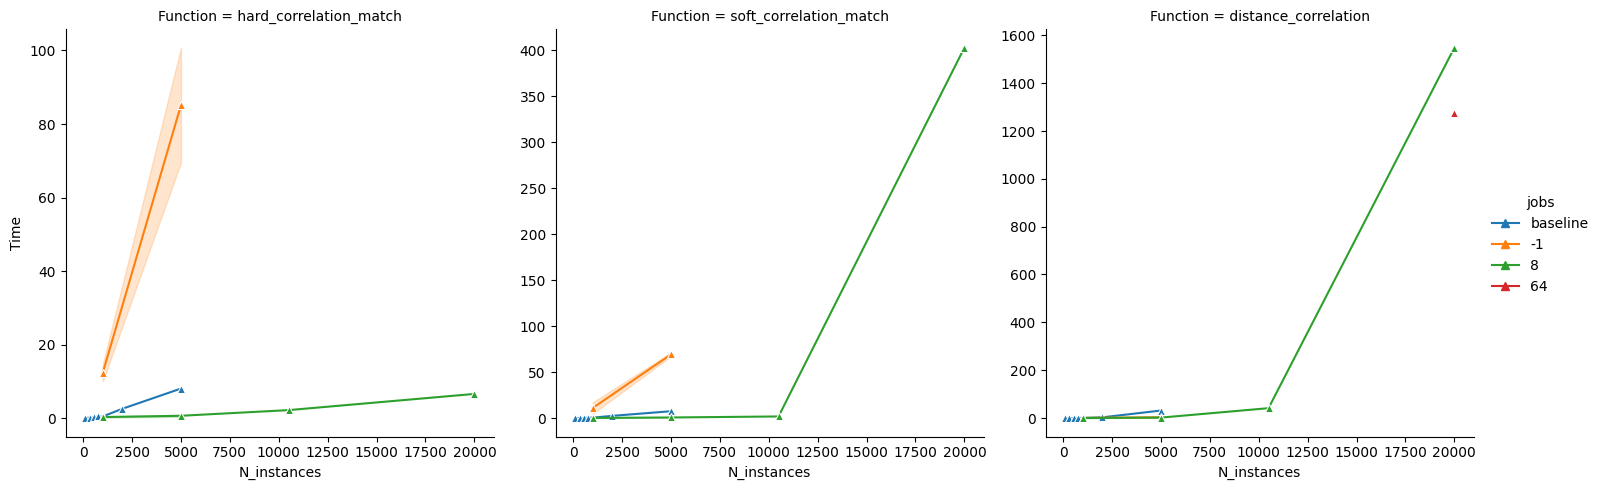

In [41]:
plot_df = df.loc[
    (df.N_features == 1000)
    & (df.Function.isin(["hard_correlation_match", "soft_correlation_match", "distance_correlation"])),
    :,
]

sns.relplot(
    data=plot_df,
    x="N_instances",
    y="Time",
    hue="jobs",
    col="Function",
    facet_kws={"sharey": False, "sharex": True},
    kind="line",
    marker="^",
)

Presumably, `n_jobs=-1` creates too much overhead (128 physical cores/256 threads).

The behavior between `distance_correlation` and `hard/soft_correlation_match` stems from the fact that `distance_correlation` computes a NxN RSM, whereas the others a DxD RSM. Here, N>=D.